**WeatherPy Homework 
(October 22, 2019)  
by Gerard Tieng**  

---

**OBJECTIVES**

• Use Citipy to select 500 cities at random based on coordinates  
• Use Openweathermap API to source weather values for each city  
• Use Pandas to create and manage a readable dataframe of the data  
• Use Matplotlib to create scatterplots of the following information:  

1. Temperature (F) vs. Latitude
2. Humidity (%) vs. Latitude
3. Cloudiness (%) vs. Latitude
4. Wind Speed (mph) vs. Latitude

# Pre-work

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy


#import API key
from api_keys import api_key


# **NOTE: Range of latitudes and longitudes below**
# http://www.geomidpoint.com/latlon.html
lat_range = (-90, 90)
lng_range = (-180, 180)

# Random Cities Selection

**Method**
1. generate random latitudes & longitudes
2. zip latitude & longitude to create citipy coordinate
3. execute citipy.nearest_city loop to create list of 500 cities

In [2]:
#1 - use np.random.uniform() to select float numbers from latitude & longitude range

rand_lat = np.random.uniform(low= -90.000, high= 90.000, size= 1500)
rand_long = np.random.uniform(low= -180.000, high= 180.000, size= 1500)

In [3]:
#2 - zip coordinates into a list holder

rand_coordinates = []
rand_coordinates = zip(rand_lat, rand_long)

In [4]:
#3 - execute citipy loop to list 500 cities in city holder list

cities = []

for coordinates in rand_coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

# API Calling: OpenWeatherMap API

In [5]:
#based on openweathermap documentation, configure "baseurl"...  
# ...to include api call, api key, & imperial units

base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="


#execute API loop to gather weather information in list holders for scatterplot

city_confirmed = []
temps = []
humid = []
wspeed = []
clouds = []
owm_lat = []
city_ind = 1


for i in cities:
   
    weather_pull = requests.get(base_url + i)
    
    if weather_pull.ok == True:
        weather_data = weather_pull.json()
        city_confirmed.append(weather_data["name"])
        owm_lat.append(weather_data["coord"]["lat"])
        temps.append(weather_data["main"]["temp"])
        humid.append(weather_data["main"]["humidity"])
        wspeed.append(weather_data["wind"]["speed"])
        clouds.append(weather_data["clouds"]["all"])
        
        print(f"Retrieving City No. {city_ind}: {i}")
        city_ind += 1
    
    #conditional for unknown city request  
    elif weather_pull.ok == False:
        print(f"City name {i} not found.")
        

City name barentsburg not found.
Retrieving City No. 1: atuona
Retrieving City No. 2: vaini
Retrieving City No. 3: moron
Retrieving City No. 4: kodiak
Retrieving City No. 5: neka
Retrieving City No. 6: tual
Retrieving City No. 7: klaksvik
Retrieving City No. 8: mataura
Retrieving City No. 9: dikson
Retrieving City No. 10: xapuri
Retrieving City No. 11: joshimath
Retrieving City No. 12: cabo san lucas
Retrieving City No. 13: palamos
Retrieving City No. 14: sovetskaya gavan
Retrieving City No. 15: dera bugti
Retrieving City No. 16: nome
Retrieving City No. 17: punta arenas
Retrieving City No. 18: dingle
Retrieving City No. 19: cape town
Retrieving City No. 20: busselton
Retrieving City No. 21: thompson
Retrieving City No. 22: saint-joseph
Retrieving City No. 23: saint-philippe
Retrieving City No. 24: bluff
Retrieving City No. 25: caldwell
Retrieving City No. 26: rikitea
Retrieving City No. 27: mareeba
Retrieving City No. 28: rosetta
Retrieving City No. 29: noumea
Retrieving City No. 30: 

Retrieving City No. 221: alekseyevka
Retrieving City No. 222: pangkalanbuun
Retrieving City No. 223: agadez
Retrieving City No. 224: saint-pierre
Retrieving City No. 225: aklavik
City name xadani not found.
Retrieving City No. 226: pedasi
City name samusu not found.
Retrieving City No. 227: narva-joesuu
Retrieving City No. 228: namatanai
Retrieving City No. 229: belur
Retrieving City No. 230: concepcion
Retrieving City No. 231: chitaga
Retrieving City No. 232: iqaluit
Retrieving City No. 233: kalabo
Retrieving City No. 234: santa marta
Retrieving City No. 235: belaya gora
Retrieving City No. 236: altamira
Retrieving City No. 237: svetlaya
Retrieving City No. 238: pleshanovo
Retrieving City No. 239: cayenne
Retrieving City No. 240: harper
City name tungkang not found.
Retrieving City No. 241: canhandugan
Retrieving City No. 242: nikolskoye
Retrieving City No. 243: butembo
Retrieving City No. 244: avera
Retrieving City No. 245: mirabela
Retrieving City No. 246: henderson
Retrieving City 

Retrieving City No. 439: qandala
Retrieving City No. 440: boguchany
Retrieving City No. 441: fontenay-le-comte
Retrieving City No. 442: kashmor
Retrieving City No. 443: maragogi
City name grand river south east not found.
Retrieving City No. 444: aiquile
Retrieving City No. 445: piney green
City name nguiu not found.
Retrieving City No. 446: wajima
Retrieving City No. 447: port hedland
Retrieving City No. 448: lhokseumawe
Retrieving City No. 449: boiro
Retrieving City No. 450: hami
Retrieving City No. 451: lima
Retrieving City No. 452: manggar
Retrieving City No. 453: watsa
Retrieving City No. 454: ambovombe
Retrieving City No. 455: cockburn town
Retrieving City No. 456: broome
Retrieving City No. 457: tilichiki
Retrieving City No. 458: lompoc
Retrieving City No. 459: raudeberg
Retrieving City No. 460: djibo
Retrieving City No. 461: marfino
Retrieving City No. 462: ormara
Retrieving City No. 463: clyde river
Retrieving City No. 464: janoshaza
Retrieving City No. 465: mahajanga
Retrievi

# Dataframe Assembly

In [26]:
# assemble dataframe from weather info list holders
weather_df = {"Cities": city_confirmed,
              "Latitude": owm_lat, 
              "Temperature(F)": temps, 
              "Humidity": humid, 
              "Windspeed": wspeed, 
              "Clouds": clouds
             }

pd.DataFrame(weather_df).head(20)

,Cities,Latitude,Temperature(F),Humidity,Windspeed,Clouds
0,Atuona,-9.80,78.75,77,14.05,0
1,Vaini,15.34,68.22,97,0.11,99
2,Moron,18.56,83.12,73,1.16,100
3,Kodiak,39.95,54.28,54,12.75,90
4,Neka,36.65,62.98,93,2.24,100
5,Tual,-5.67,77.94,81,7.27,3
6,Klaksvik,62.23,46.40,87,18.34,100
7,Mataura,-46.19,43.00,91,4.00,91
8,Dikson,73.51,27.36,92,18.86,100
9,Xapuri,-10.65,77.00,88,4.70,75


# Matplotlib - Scatterplots

### Temperature (F) vs. Latitude

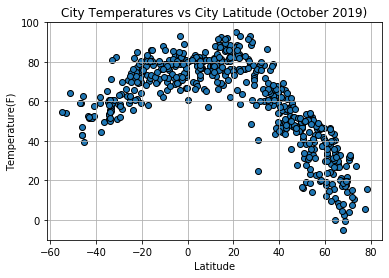

In [18]:
#plot temp vs lat
tempVSlat = plt.scatter(weather_df["Latitude"], weather_df["Temperature(F)"], edgecolors="k")

#labels and legend
plt.title("City Temperatures vs City Latitude (October 2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid(True)

#save and show
plt.savefig("tempVSlat_GT.png")
plt.show()

### Humidity (%) vs. Latitude

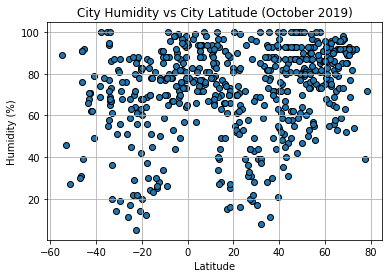

In [40]:
#plot humid vs lat
humidVSlat = plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors="k")

#labels and legend
plt.title("City Humidity vs City Latitude (October 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#save and show
plt.savefig("humidVSlat_GT.png")
plt.show()

### Windspeed (mph) vs. Latitude



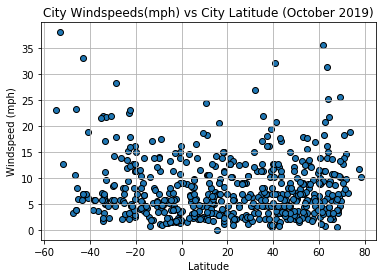

In [39]:
#plot clouds vs lat
windsVSlat = plt.scatter(weather_df["Latitude"], weather_df["Windspeed"], edgecolors="k")

#labels and legend
plt.title("City Windspeeds(mph) vs City Latitude (October 2019)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)

#save and show
plt.savefig("windsVSlat_GT.png")
plt.show()

### Cloudiness (%) vs. Latitude

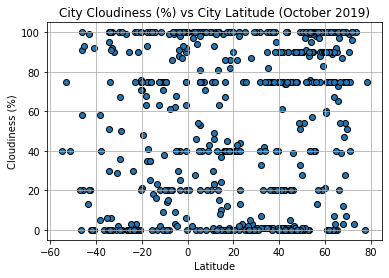

In [38]:
#plot wind vs lat
cloudsVSlat = plt.scatter(weather_df["Latitude"], weather_df["Clouds"], edgecolor="k")

#labels and legend
plt.title("City Cloudiness (%) vs City Latitude (October 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save and show
plt.savefig("cloudsVSlat_GT.png")
plt.show()

# CONCLUSION

• With no city data below the -60 latitude mark, it seems that there are little to no cities near the polar latitudes or OpenWeatherMap's data does not cover those areas.

• Based on the data, there is an observable curve that shows that cities located closer to the equator line are typically hotter than those that are further.

• A majority of global cities experience windspeeds between 0-10 mph. Meanwhile, windspeeds above 30mph are less likely but will typically occur at the latitude limits.

• With high concentrations on each horizontal line, it seems that cloudiness measurements are likely to be reported in 20% increments.

• Most cities experience humidity above 60%. Meanwhile, city locations under 40% humidity are likely to be found within the 20-40 latitude degrees on either side of the equator line.